##Домашняя работа #1.
##Image pre-processing.

В этой домашней работе мы попробуем поприменять самые простые способы обработки изображений.

* Soft deadline: **20.02.2023 03:00:00 +0003 GMT** 
* Hard deadline: **27.02.2023 03:00:00 +0003 GMT**

In [ ]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

##### Задача 1 (3 балла)

Загрузите изображение *lena.png* в переменную **lena**. Отобразите результат на экран. Убедитесь, что `opencv` открывает изображение в формате BGR, переведите его в RGB несколькими способами: 
* c помощью функций split & merge
* с помощью индексации в numpy 
* с помощью cvtColor

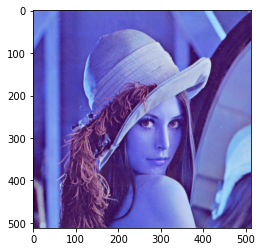

In [ ]:
lena = cv2.imread('lena.png')
plt.imshow(lena)

Перевод в RGB:

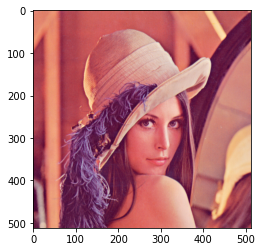

In [ ]:
# 1 способ
b,g,r = cv2.split(lena)
RGB_lena_1 = cv2.merge((r,g,b))
plt.imshow(RGB_lena_1)

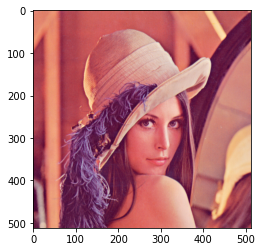

In [ ]:
# 2 способ
RGB_lena_2 = lena[:,:,::-1]
plt.imshow(RGB_lena_2)

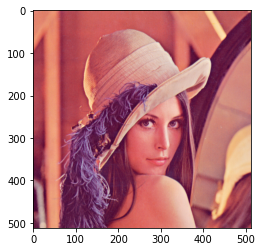

In [ ]:
# 3 способ
RGB_lena_3 = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_lena_3)

##### Задача 2 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

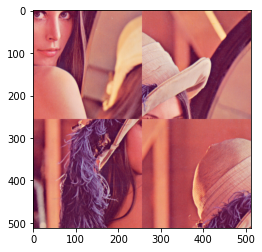

In [ ]:
a = RGB_lena_3.shape[0] // 2
b = RGB_lena_3.shape[1] // 2
new_lena = np.copy(RGB_lena_3)
temp1 = np.array(new_lena[:a, :b, :])
temp2 = np.array(new_lena[a:, b:, :])
new_lena[a:, b:, :] = temp1
new_lena[:a, :b, :] = temp2
plt.imshow(new_lena)

##### Задача 3 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**. Переведите исходное цветное изображение lena в изображение в градациях серого с помощью функции cvtColor. (lena_gray_cvt). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране. 

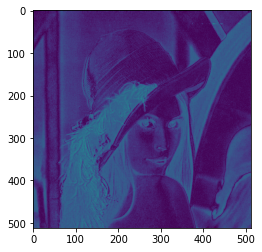

In [ ]:
# усреднение
lena_gray_my = RGB_lena_3.mean(axis = 2)
# перевод в градации серого с помощью cvtColor
lena_gray_cvt = cv2.cvtColor(RGB_lena_3, cv2.COLOR_RGB2GRAY)
# модуль разности
plt.imshow(np.abs(lena_gray_my - lena_gray_cvt))

##### Задача 4 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

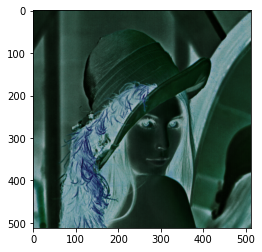

In [ ]:
lena_new = cv2.cvtColor(RGB_lena_3, cv2.COLOR_RGB2HSV)
# инвертируем
lena_new = 255 - lena_new
# обратно в RGB
lena_new = cv2.cvtColor(lena_new, cv2.COLOR_HSV2RGB)
plt.imshow(lena_new)

##### Задача 5 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

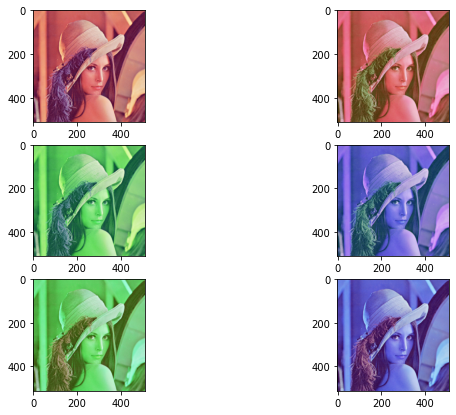

In [ ]:
import itertools
# перестановки r, g, b
perm_set = itertools.permutations(list(cv2.split(RGB_lena_3)))
lena_perm = []
for i in perm_set:
    lena_perm.append(cv2.merge(i))

# отображаем все перестановки
fig, ax = plt.subplots(3, 2, figsize=(10,7))
k = -1
for i in range(3):
    for j in range(2):
        k += 1
        ax[i,j].imshow(lena_perm[k])
    

#### Задача 6 (3 балла)
Переведите изображение **lena** в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) и эквализации гистограммы ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности

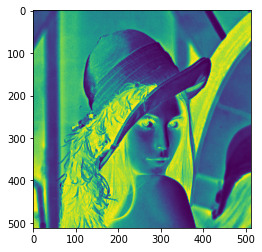

In [ ]:
lena_gray = cv2.cvtColor(RGB_lena_3, cv2.COLOR_RGB2GRAY)
lena_equalize = cv2.equalizeHist(lena_gray)
lena_normalize = cv2.normalize(lena_gray, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# Pазность полученных результатов
diff = lena_normalize - lena_equalize
plt.imshow(diff)

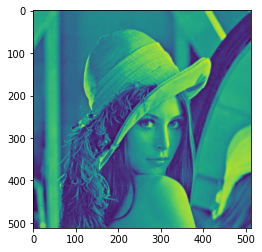

In [ ]:
# Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности
plt.imshow(lena_equalize + lena_normalize + diff)

#### Задача 7 (3 балла)
Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [ ]:
import random
# заменяем значения рандомных пикселей на 255 и 0
def add_noise(src, p, q):
    a, b = src.shape
    pixels_change = round(q * src.size)
    for i in range(pixels_change):
        y = random.randint(0, a - 1)
        x = random.randint(0, b - 1)
        src[y][x] = 255
    pixels_change = round(p * src.size)
    for i in range(pixels_change):
        y = random.randint(0, a - 1)
        x = random.randint(0, b - 1)
        src[y][x] = 0
    return src

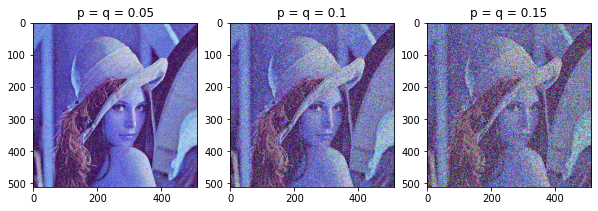

In [ ]:
lena = cv2.imread('lena.png')
r, g, b = cv2.split(lena)
pq = [0.05, 0.1, 0.15]
fig, ax = plt.subplots(1, 3, figsize=(10,7))
for i in range(3):
    r1 = add_noise(r, pq[i], pq[i])
    g1 = add_noise(g, pq[i], pq[i])
    b1 = add_noise(b, pq[i], pq[i])
    ax[i].imshow(cv2.merge((r1,g1,b1)))
    ax[i].set_title('p = q = '+str(pq[i]))

#### Задча 8 (3 балла)
Реализуйте функцию пространственной фильтрации изображения однородным усредняющим фильтром размера $n \times n$ (все коэффициенты маски равны $\frac{1}{n^2}$). При вычислении среднего используйте тот факт, что при переходе от точки к точке обновляется только часть элементов изображения под маской. Примените реализованный фильтр к предварительно переведенному в градации серого изображению $lena.jpg$ при $n = 3$ и $n = 5$. Визуализируйте изображение, представляющее собой разность полученных результатов фильтрации.

In [ ]:
def average_filter(image, k):
    # маска
    mask = np.ones([k, k]) / k**2
    output = np.zeros_like(image)
    # делаем padding
    image_padded = np.zeros((image.shape[0] + k - 1, image.shape[1] + k - 1))
    image_padded[(k-1)//2:-(k-1)//2, (k-1)//2:-(k-1)//2] = image
    # перемножаем с маской и суммируем
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y, x]=(mask * image_padded[y: y + k, x: x + k]).sum()

    return output


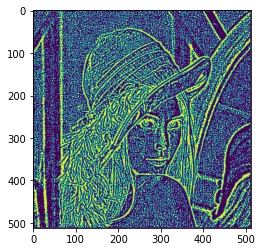

In [ ]:
lena_gray = cv2.cvtColor(RGB_lena_3, cv2.COLOR_RGB2GRAY)
image_filtered_3 = average_filter(lena_gray, k = 3)
image_filtered_5 = average_filter(lena_gray, k = 5)
plt.imshow(image_filtered_3 - image_filtered_5)

#### Задача 9 (6 баллов) 
С помощью [виджетов](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. Отдельно выведите изображение **lena** с гаммой равной 2.

In [ ]:
from ipywidgets import interactive
import ipywidgets as widgets

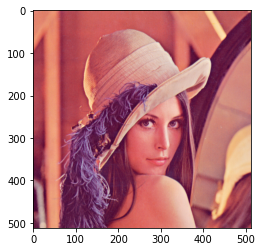

In [ ]:
# оригинальное изображение
plt.imshow(RGB_lena_3)

In [ ]:
from IPython.display import display

# функция гамма-преобразования
def gamma_correction(gamma, A):
    img_gamma = A*np.power(RGB_lena_3/255.0,  gamma)
    plt.imshow(img_gamma)


w = interactive(gamma_correction, gamma = widgets.FloatSlider(value=1., min=0, max=2, step=0.1, description='gamma:', 
                                                              disabled=False, continuous_update=False, orientation='horizontal',
                                                              readout=True,readout_format='.1f'), 
                A = widgets.FloatSlider(value=1., min=0, max=1, step=0.1, description='A:', disabled=False,
                                        continuous_update=False, orientation='horizontal', readout=True,readout_format='.1f'))
display(w)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='gamma:', max=2.0, readout_f…

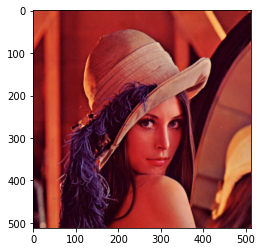

In [ ]:
# Изображение lena с гаммой равной 2.
gamma_correction(2, 1)   